In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [38]:
data = pd.read_csv("/content/drive/MyDrive/Data/blinkit_data.csv")
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [39]:
data.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [40]:
# checking the size of data
print(f'size of the data : {data.shape}')

size of the data : (8523, 12)


In [41]:
# field information
data.columns # columns  name

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [42]:
#datatypes
data.dtypes  #checking the type  of column

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


**Data Cleaning**

In [43]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [44]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'LF':'Low Fat',
                                                              'low fat':'Low Fat',
                                                              'reg':'Regular'})

In [45]:
# checking the values if they are change or not
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


**Business Requirements**

In [46]:
# KPI'S
# total sales
total_sales = data['Sales'].sum()
print(f'Total sales : ${total_sales:,.0f}')
#Average Sales
Avg_sales = data['Sales'].mean()
print(f'Average Sales : ${Avg_sales:,.2f}')
#Number of item solds
number_of_items_sold = data['Sales'].count()
print(f'number of items sold : {number_of_items_sold:,.0f}')
#Average rating
Avg_rating = data['Rating'].mean()
print(f'Average Rating : {Avg_rating:,.1f}')

Total sales : $1,201,681
Average Sales : $140.99
number of items sold : 8,523
Average Rating : 4.0


**Charts Requirements**

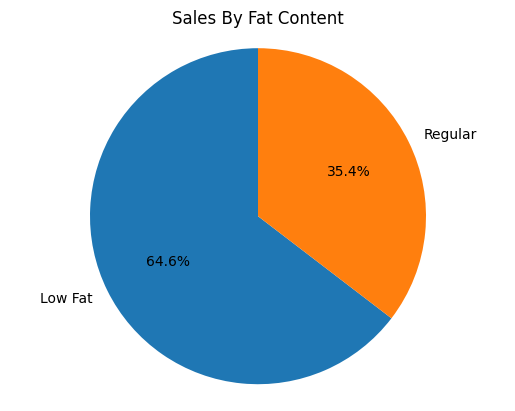

In [47]:
## Total sales by Fat Content
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,autopct = '%.1f%%',startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()

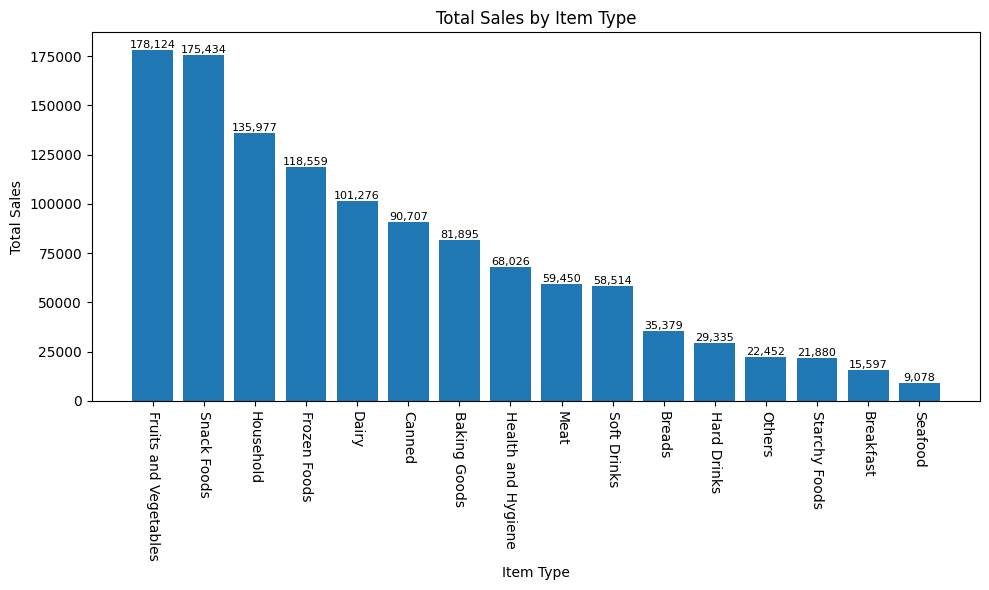

In [48]:
# Total sales by item Type
sales_by_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize= (10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
  f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

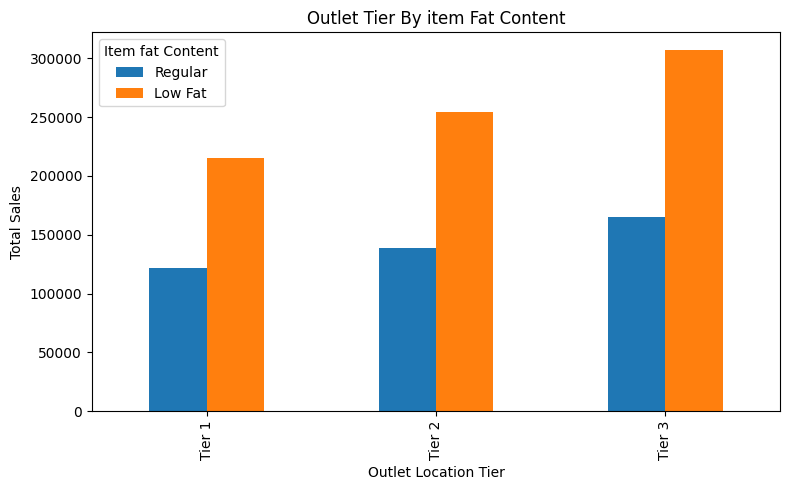

In [53]:
## fat content by outlet for total sales
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]


ax = grouped.plot(kind = 'bar',figsize=(8,5),title='Outlet Tier By item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item fat Content')
plt.tight_layout()
plt.show()

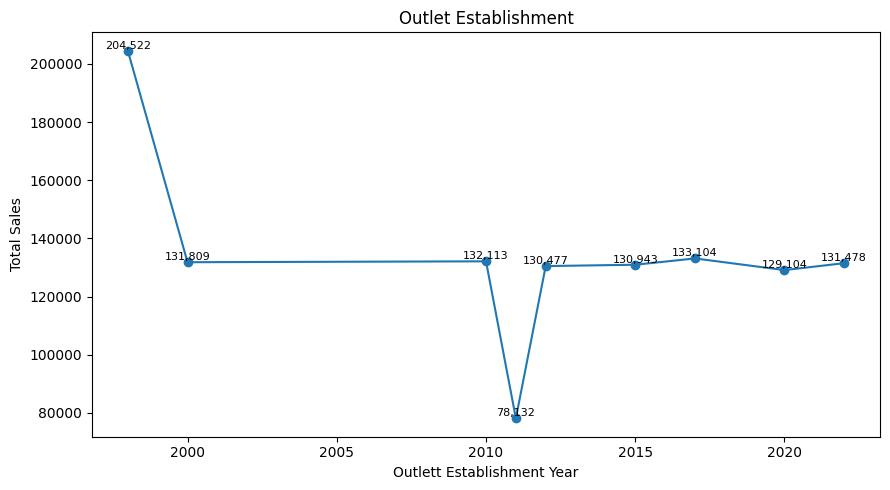

In [54]:
## Total sales by outlet establishment
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel('Outlett Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha = 'center',va = 'bottom',fontsize=8)

plt.tight_layout()
plt.show()

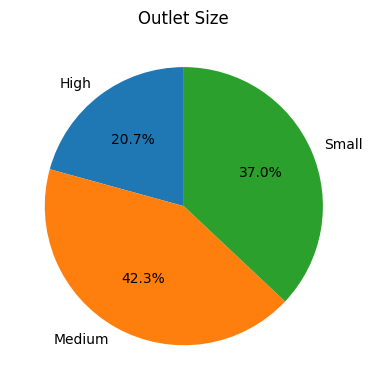

In [56]:
## sales by outlet size
sales_by_size = data.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct = '%1.1f%%',startangle = 90 )
plt.title("Outlet Size")
plt.tight_layout()
plt.show()

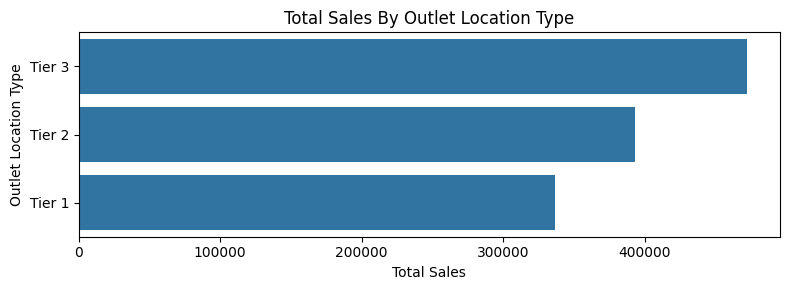

In [57]:
## Sales by Ouutlet Location
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales',y='Outlet Location Type',data = sales_by_location)

plt.title('Total Sales By Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()